# Classification Lab
In this lab we will review the different classification techniques proposed in class. In this example we will use a synthetic dataset in $\mathbb{R}^2$, we will generate 2 half moons which separation can be controlled.

## Data Preparation

In [1]:
function generate_data(N, r1, r2, r3)
    N1 = trunc(Int,N/4)
    N2 = N-N1
    phi1 = rand(N1,1)*2pi
    R1 = sqrt.(rand(N1,1))
    moon = [cos.(phi1).*R1*r1,sin.(phi1).*R1*r1,zeros(N1,1)]
    d = r3-r2
    phi2 = 10pi + rand(N2,1)*0.5pi
    R2 = sqrt.(rand(N2,1))
    crescent = [cos.(phi2).*(r2+R2*d),sin.(phi2).*(r2+R2*d),ones(N2,1)]
    return moon,crescent
end

generate_data (generic function with 1 method)

In [2]:
# Generating separable data
N = 100
r1 = 10
r2 = 20
r3 = 45
data1,data2 = generate_data(N, r1, r2, r3);

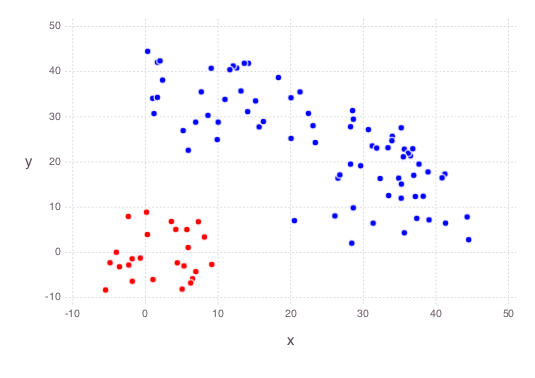

In [5]:
using Gadfly
plot(layer(x=data1[1],y=data1[2],Geom.point, Theme(default_color="red")),layer(x=data2[1],y=data2[2],Geom.point,Theme(default_color="blue")))

In [4]:
# Shuffling dataset
dataset = [data1[1] data1[2] data1[3];data2[1] data2[2] data2[3]]
dataset = dataset[shuffle(1:end), :]
y_train = dataset[3]
x_train = [dataset[:,1] dataset[:,2]]

100×2 Array{Float64,2}:
 30.7019   27.1684 
 12.079    41.26   
 -3.5768   -3.18527
  9.0546   40.7422 
  5.70845   5.04894
 26.515    16.4277 
  8.12408   3.39233
 35.2273   27.5657 
 13.6154   41.8525 
  8.60935  30.3138 
 28.6347   29.4728 
 14.0784   31.1485 
 35.6505    4.32514
  ⋮                
 33.491    12.5726 
  5.19388  26.9435 
 26.7692   17.1415 
  2.35891  38.1296 
 -1.83116  -1.42736
 18.3162   38.6919 
 35.5161   21.153  
 13.155    35.719  
  1.64973  42.0665 
  4.18299   5.07706
  6.48318  -5.83608
 38.916    17.801  

## Logistic Regression

In [6]:
function sigmoid(beta,X)
    prod = beta*X'
    return 1./(1+exp.(-prod))
end

sigmoid (generic function with 1 method)

In [7]:
function cost(y, p, p_)
    lp = log.(p)
    lp_ = log.(p_)
    ylp = y.*lp
    ylp_ = (1-y).*lp_
    return sum(ylp+ylp_)
end

cost (generic function with 1 method)

In [31]:
niter = 400
tol = 1e-3
x_train_1 = [ones(N,1) x_train]
beta_i = 0.1*rand(1,3)
for i = 1:niter
    b_ = beta_i
    p = sigmoid(beta_i,x_train_1)
    p_ = 1-p
    pp_ = p.*p_
    W = spdiagm(0=>pp_)
    H = x_train_1'*W*x_train_1
    G = x_train_1'*(y_train-p)'
    D = H\G
    beta_i = beta_i + 0.0002*D'
    
    costo = cost(y_train, p, p_)
    nbeta = norm(b_- beta_i, Inf)
    println("[$i] Cost: $costo, $beta_i, $nbeta")
    if  nbeta < tol
        break
    end
end

[1] Cost: -540.3513910078627, [0.065929 0.00175773 0.0554445], 0.0037031812549954265
[2] Cost: -537.9087837595406, [0.0624166 0.00179233 0.0552942], 0.0036972723764220495
[3] Cost: -535.4771841310368, [0.0589081 0.00182654 0.0551454], 0.003691462956359858
[4] Cost: -533.0564492943107, [0.0554035 0.00186036 0.0549981], 0.0036857512309225234
[5] Cost: -530.6464390868466, [0.0519027 0.00189379 0.0548522], 0.003680135482286965
[6] Cost: -528.2470159450226, [0.0484056 0.00192685 0.0547078], 0.0036746140372708267
[7] Cost: -525.8580448395231, [0.0449121 0.00195954 0.0545647], 0.003669185265961609
[8] Cost: -523.4793932127216, [0.0414223 0.00199187 0.0544231], 0.0036638475803950766
[9] Cost: -521.1109309179608, [0.0379359 0.00202385 0.0542828], 0.00365859943328109
[10] Cost: -518.7525301606606, [0.034453 0.00205547 0.0541439], 0.0036534393167749722
[11] Cost: -516.4040654411955, [0.0309735 0.00208675 0.0540063], 0.00364836576129234
[12] Cost: -514.0654134994709, [0.0274973 0.0021177 0.0538701

[203] Cost: -167.8016378281459, [-0.621465 0.00531193 0.0414587], 0.0035291270249415826
[204] Cost: -166.27748529105742, [-0.624963 0.00532379 0.0414365], 0.0035314838445192264
[205] Cost: -164.75484893656866, [-0.628463 0.00533566 0.0414146], 0.0035338685048331925
[206] Cost: -163.2337134887141, [-0.631966 0.00534753 0.041393], 0.003536281067245713
[207] Cost: -161.71406375305196, [-0.635471 0.00535941 0.0413717], 0.003538721594798346
[208] Cost: -160.19588461546348, [-0.63898 0.00537129 0.0413508], 0.0035411901522128903
[209] Cost: -158.67916104096605, [-0.642491 0.00538317 0.0413301], 0.003543686805893222
[210] Cost: -157.1638780725388, [-0.646005 0.00539506 0.0413097], 0.0035462116239269835
[211] Cost: -155.6500208299619, [-0.649521 0.00540695 0.0412895], 0.003548764676088177
[212] Cost: -154.13757450866842, [-0.653041 0.00541885 0.0412697], 0.0035513460338388236
[213] Cost: -152.62652437860834, [-0.656564 0.00543076 0.0412502], 0.0035539557703327526
[214] Cost: -151.11685578312574

[320] Cost: 3.7741384638781583, [-1.05659 0.00684403 0.0407271], 0.00404152570908098
[321] Cost: 5.2106356879008935, [-1.06062 0.00685952 0.0407365], 0.004048587984201791
[322] Cost: 6.64709637103615, [-1.06465 0.00687507 0.0407461], 0.004055700128010808
[323] Cost: 8.083532299719742, [-1.06869 0.00689068 0.040756], 0.004062862514532414
[324] Cost: 9.519955274450599, [-1.07273 0.00690636 0.0407662], 0.004070075522105565
[325] Cost: 10.956377110529866, [-1.07678 0.00692209 0.0407766], 0.004077339533442502
[326] Cost: 12.39280963880449, [-1.08084 0.0069379 0.0407873], 0.004084654935683767
[327] Cost: 13.829264706413667, [-1.0849 0.00695377 0.0407983], 0.004092022120458322
[328] Cost: 15.265754177539653, [-1.08898 0.0069697 0.0408095], 0.004099441483941535
[329] Cost: 16.702289934161826, [-1.09306 0.0069857 0.040821], 0.004106913426916226
[330] Cost: 18.138883876815346, [-1.09714 0.00700177 0.0408328], 0.0041144383548335954
[331] Cost: 19.575547925353625, [-1.10124 0.00701791 0.0408449], 